In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import json
import numpy as np
import requests
import os
import re
import seaborn as sns

from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Activation, RandomFlip, RandomRotation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import pickle

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
to_save = {'X_order_10_train': '', 'X_order_10_test': '', 'X_order_10_valid': '', 'y_order_10_train': '', 'y_order_10_test': '', 'y_order_10_valid': ''}

In [4]:
path = '/content/drive/MyDrive/mushroom_data/'

In [5]:
for item in to_save:
    print(item)
    with open(f'{path}{item}.pickle', 'rb') as f:
        to_save[item] = pickle.load(f)

X_order_10_train
X_order_10_test
X_order_10_valid
y_order_10_train
y_order_10_test
y_order_10_valid


In [6]:
X_train = to_save['X_order_10_train']
X_test = to_save['X_order_10_test']
X_valid = to_save['X_order_10_valid']
y_train = to_save['y_order_10_train']
y_test = to_save['y_order_10_test']
y_valid = to_save['y_order_10_valid']

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(991, 112, 112, 3) (991, 10) (122, 112, 112, 3) (122,) (129, 112, 112, 3) (129, 10)


In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
num_classes = 10
input_shape = (112,112,3)

model = keras.Sequential()

model.add(Conv2D(112, (3,3), input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(28, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(112, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [11]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 112)     3136      
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 112)    448       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 55, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 56)        56504     
                                                                 
 batch_normalization_1 (Batc  (None, 53, 53, 56)       2

In [13]:
epochs=250
history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // 32,
        epochs=epochs,
        validation_data=(X_valid, y_valid))

Epoch 1/250
30/30 [==============================] - 19s 176ms/step - loss: 2.6573 - accuracy: 0.1595 - val_loss: 2.5038 - val_accuracy: 0.0930
Epoch 2/250
30/30 [==============================] - 3s 109ms/step - loss: 2.1378 - accuracy: 0.2471 - val_loss: 3.2724 - val_accuracy: 0.0930
Epoch 3/250
30/30 [==============================] - 3s 114ms/step - loss: 1.9729 - accuracy: 0.3149 - val_loss: 4.3970 - val_accuracy: 0.0930
Epoch 4/250
30/30 [==============================] - 5s 154ms/step - loss: 1.8550 - accuracy: 0.3326 - val_loss: 5.0268 - val_accuracy: 0.0930
Epoch 5/250
30/30 [==============================] - 3s 113ms/step - loss: 1.7915 - accuracy: 0.3660 - val_loss: 6.0117 - val_accuracy: 0.0930
Epoch 6/250
30/30 [==============================] - 3s 111ms/step - loss: 1.7613 - accuracy: 0.3629 - val_loss: 6.7275 - val_accuracy: 0.0930
Epoch 7/250
30/30 [==============================] - 5s 158ms/step - loss: 1.6644 - accuracy: 0.4161 - val_loss: 7.5809 - val_accuracy: 0.093

In [14]:
model.save('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10')

In [15]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_history.pickle', 'wb') as f:
    pickle.dump(history.history['loss'], f)

In [16]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_history.pickle', 'rb') as f:
    loss = pickle.load(f)

In [17]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_valid_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_loss'], f)

In [18]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_valid_history.pickle', 'rb') as f:
    val_loss = pickle.load(f)

In [19]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['accuracy'], f)

In [20]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_accuracy_history.pickle', 'rb') as f:
    accuracy = pickle.load(f)

In [21]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_val_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_accuracy'], f)

In [22]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10_val_accuracy_history.pickle', 'rb') as f:
    val_accuracy = pickle.load(f)

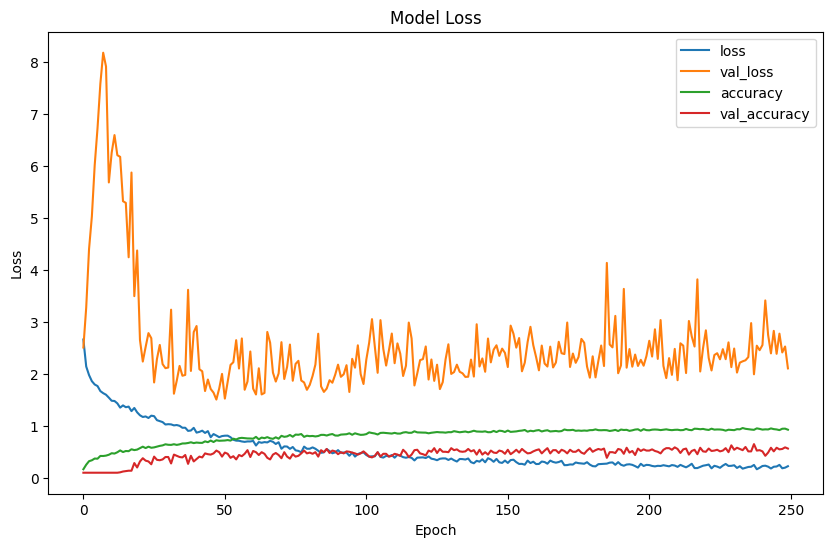

In [23]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

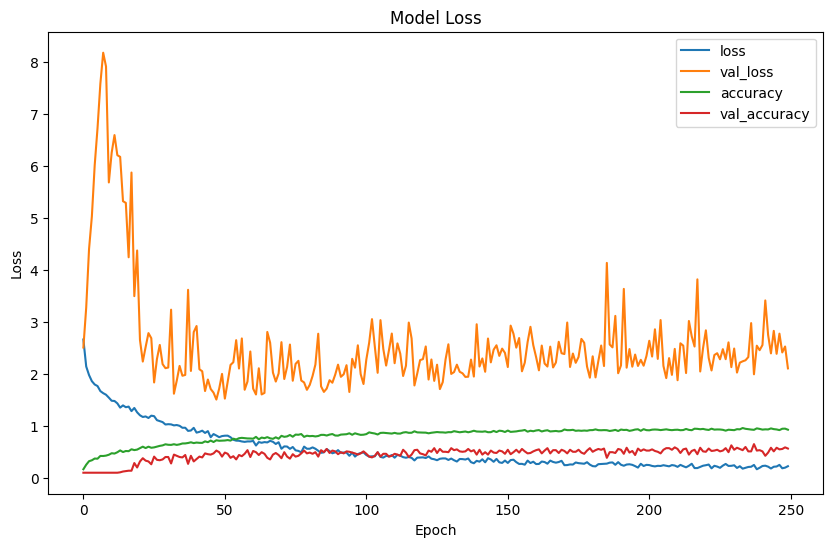

In [24]:
plt.figure(figsize=(10,6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [25]:
model = keras.models.load_model('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_10')

In [26]:
y_test_categorical = to_categorical(y_test)

In [27]:
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.8686065673828125
Test accuracy: 0.5655737519264221


In [28]:
predictions = model.predict(X_test, verbose=0)
preds = [np.argmax(p) for p in predictions]

In [29]:
accuracy_score(preds, y_test)

0.5655737704918032

In [30]:
print(classification_report(y_test, preds, zero_division=1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.60      0.46      0.52        13
           2       0.42      0.42      0.42        12
           3       0.44      0.33      0.38        12
           4       0.86      0.50      0.63        12
           5       0.42      0.77      0.54        13
           6       0.45      0.42      0.43        12
           7       0.56      0.42      0.48        12
           8       0.90      0.75      0.82        12
           9       0.41      0.64      0.50        11

    accuracy                           0.57       122
   macro avg       0.60      0.56      0.56       122
weighted avg       0.60      0.57      0.57       122

